<a href="https://www.kaggle.com/code/anshtanwar/amazon-s-top-100-books-starter-eda-nlp?scriptVersionId=150013856" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius:0px; border:orange solid; padding: 15px; background-color: chetwode; font-size:100%; text-align:center">
<center> <h1> Starter Notebook for the Dataset </h1>
    <h3><a href="https://www.kaggle.com/datasets/anshtanwar/top-200-trending-books-with-reviews/data">"Amazon's Top 100 Bestselling Books"</a></h3><br>

<center><div style="border-radius:0px; border:3eb489 ; padding: 12px; background-color: e6f2e6; font-size:110%; text-align:center">Welcome to this starter notebook on "Amazon's Top 100 Bestselling Books".This dataset offers an in-depth look into Amazon's top 100 Bestselling books along with their customer reviews.The dataset has two parts.The first part is related to book deatils and the second part shows the reviews and ratings for that book. This data was Scrapped in <b>November 2023</b>.<br>This notebook serves as a starting point for analysis and can be customized to suit specific research needs.</div>


In [1]:
# Data Processing
import numpy as np
import pandas as pd

# Basic Visualization tools
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots


# Special Visualization
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value
import networkx as nx

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)
'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
df1 = pd.read_csv('/kaggle/input/top-200-trending-books-with-reviews/Top-100 Trending Books.csv')
df2 = pd.read_csv("/kaggle/input/top-200-trending-books-with-reviews/customer reviews.csv")


In [3]:
df1.head()

Rank                                         book title  book price  \
0     1                       Iron Flame (The Empyrean, 2)       18.42   
1     2                                    The Woman in Me       20.93   
2     3                                  My Name Is Barbra       31.50   
3     4  Friends, Lovers, and the Big Terrible Thing: A...       23.99   
4     5                              How to Catch a Turkey        5.65   

   rating            author  year of publication               genre  \
0     4.1    Rebecca Yarros                 2023     Fantasy Romance   
1     4.5    Britney Spears                 2023              Memoir   
2     4.5  Barbra Streisand                 2023       Autobiography   
3     4.4     Matthew Perry                 2023              Memoir   
4     4.8      Adam Wallace                 2018  Childrens, Fiction   

                                                 url  
0  amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...  
1  amazon.com/Woman-Me-Britney-Spears/dp/16680090...  
2  amazon.com/My-Name-Barbra-Streisand/dp/0525429...  
3  amazon.com/Friends-Lovers-Big-Terrible-Thing/d...  
4  amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...

In [4]:
df1.describe()

Rank  book price     rating  year of publication
count  100.000000  100.000000  97.000000            100.00000
mean    50.500000   12.708600   4.689691           2013.76000
std     29.011492    7.915568   0.181133             15.13049
min      1.000000    2.780000   4.100000           1947.00000
25%     25.750000    6.302500   4.600000           2014.00000
50%     50.500000   11.480000   4.700000           2019.00000
75%     75.250000   16.990000   4.800000           2023.00000
max    100.000000   48.770000   5.000000           2024.00000

In [5]:
df2.head()

Sno        book name                                       review title  \
0    0  The Woman in Me   Unbelievably impressive. Her torn life on paper.   
1    1  The Woman in Me                         What a heartbreaking story   
2    2  The Woman in Me  Britney you are so invincible! You are an insp...   
3    3  The Woman in Me                               Fast Read, Sad Story   
4    4  The Woman in Me                       Buy it, it’s worth the read!   

           reviewer  reviewer rating  \
0  Murderess Marbie                4   
1               L J                5   
2             Jamie                5   
3               KMG                5   
4   Stephanie Brown                5   

                                  review description  is_verified        date  \
0  I'm only a third way in. Shipped lightening fa...         True  26-10-2023   
1  "There have been so many times when I was scar...         True  06-11-2023   
2  The media could not be loaded. I personally ha...         True  01-11-2023   
3  I have been a fan of Britney's music since the...         True  25-10-2023   
4  Whether or not you’re a fan, it’s a great read...         True  01-11-2023   

                                        timestamp        ASIN  
0  Reviewed in the United States October 26, 2023  1668009048  
1  Reviewed in the United States November 6, 2023  1668009048  
2  Reviewed in the United States November 1, 2023  1668009048  
3  Reviewed in the United States October 25, 2023  1668009048  
4  Reviewed in the United States November 1, 2023  1668009048

In [6]:
df2.describe()

Sno  reviewer rating
count  920.000000       920.000000
mean   459.500000         4.826087
std    265.725422         0.432839
min      0.000000         2.000000
25%    229.750000         5.000000
50%    459.500000         5.000000
75%    689.250000         5.000000
max    919.000000         5.000000

In [7]:
df2.describe(include='O')

book name review title  \
count                                                 920          920   
unique                                                 91          829   
top     The Ballad of Songbirds and Snakes (A Hunger G...   Great book   
freq                                                   20           14   

               reviewer                                 review description  \
count               920                                                920   
unique              819                                                910   
top     Amazon Customer  I was skeptical about this book keeping my int...   
freq                 40                                                  2   

              date                                       timestamp        ASIN  
count          920                                             920         920  
unique         243                                             243          92  
top     02-11-2023  Reviewed in the United States November 2, 2023  1668009048  
freq            38                                              38          10

### Check Missing Data (missingno)
missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset

<Axes: >

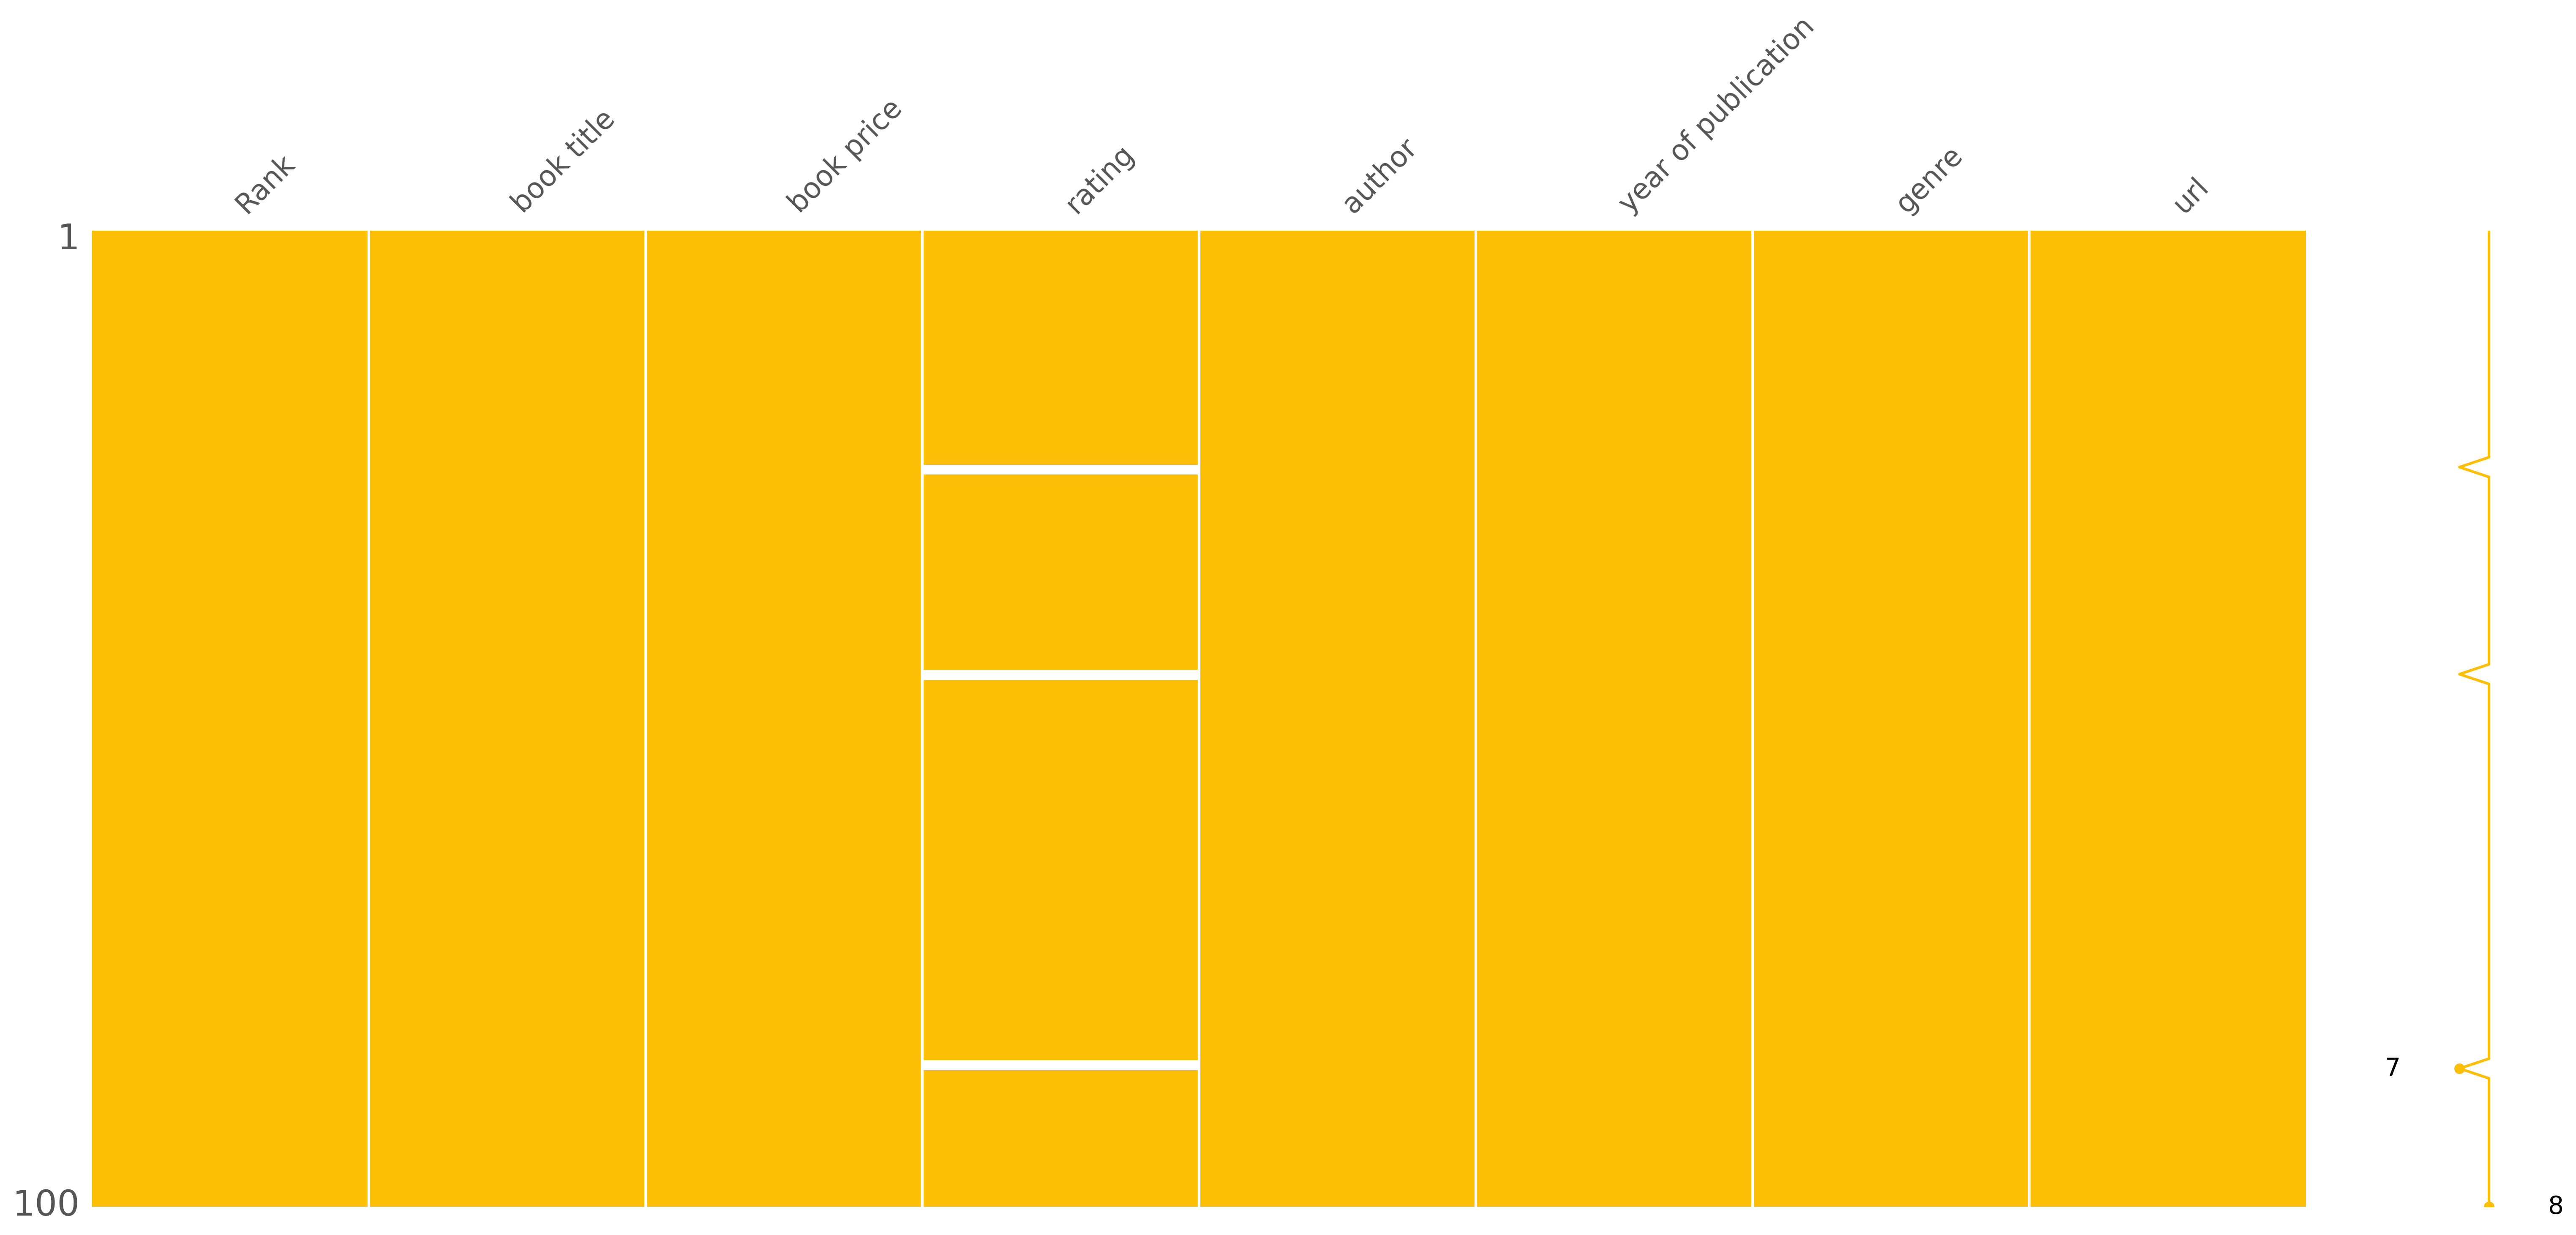

In [8]:
msno.matrix(df1,color=(0.99, 0.75, 0.023))

Data has some missing values in ratings

<Axes: >

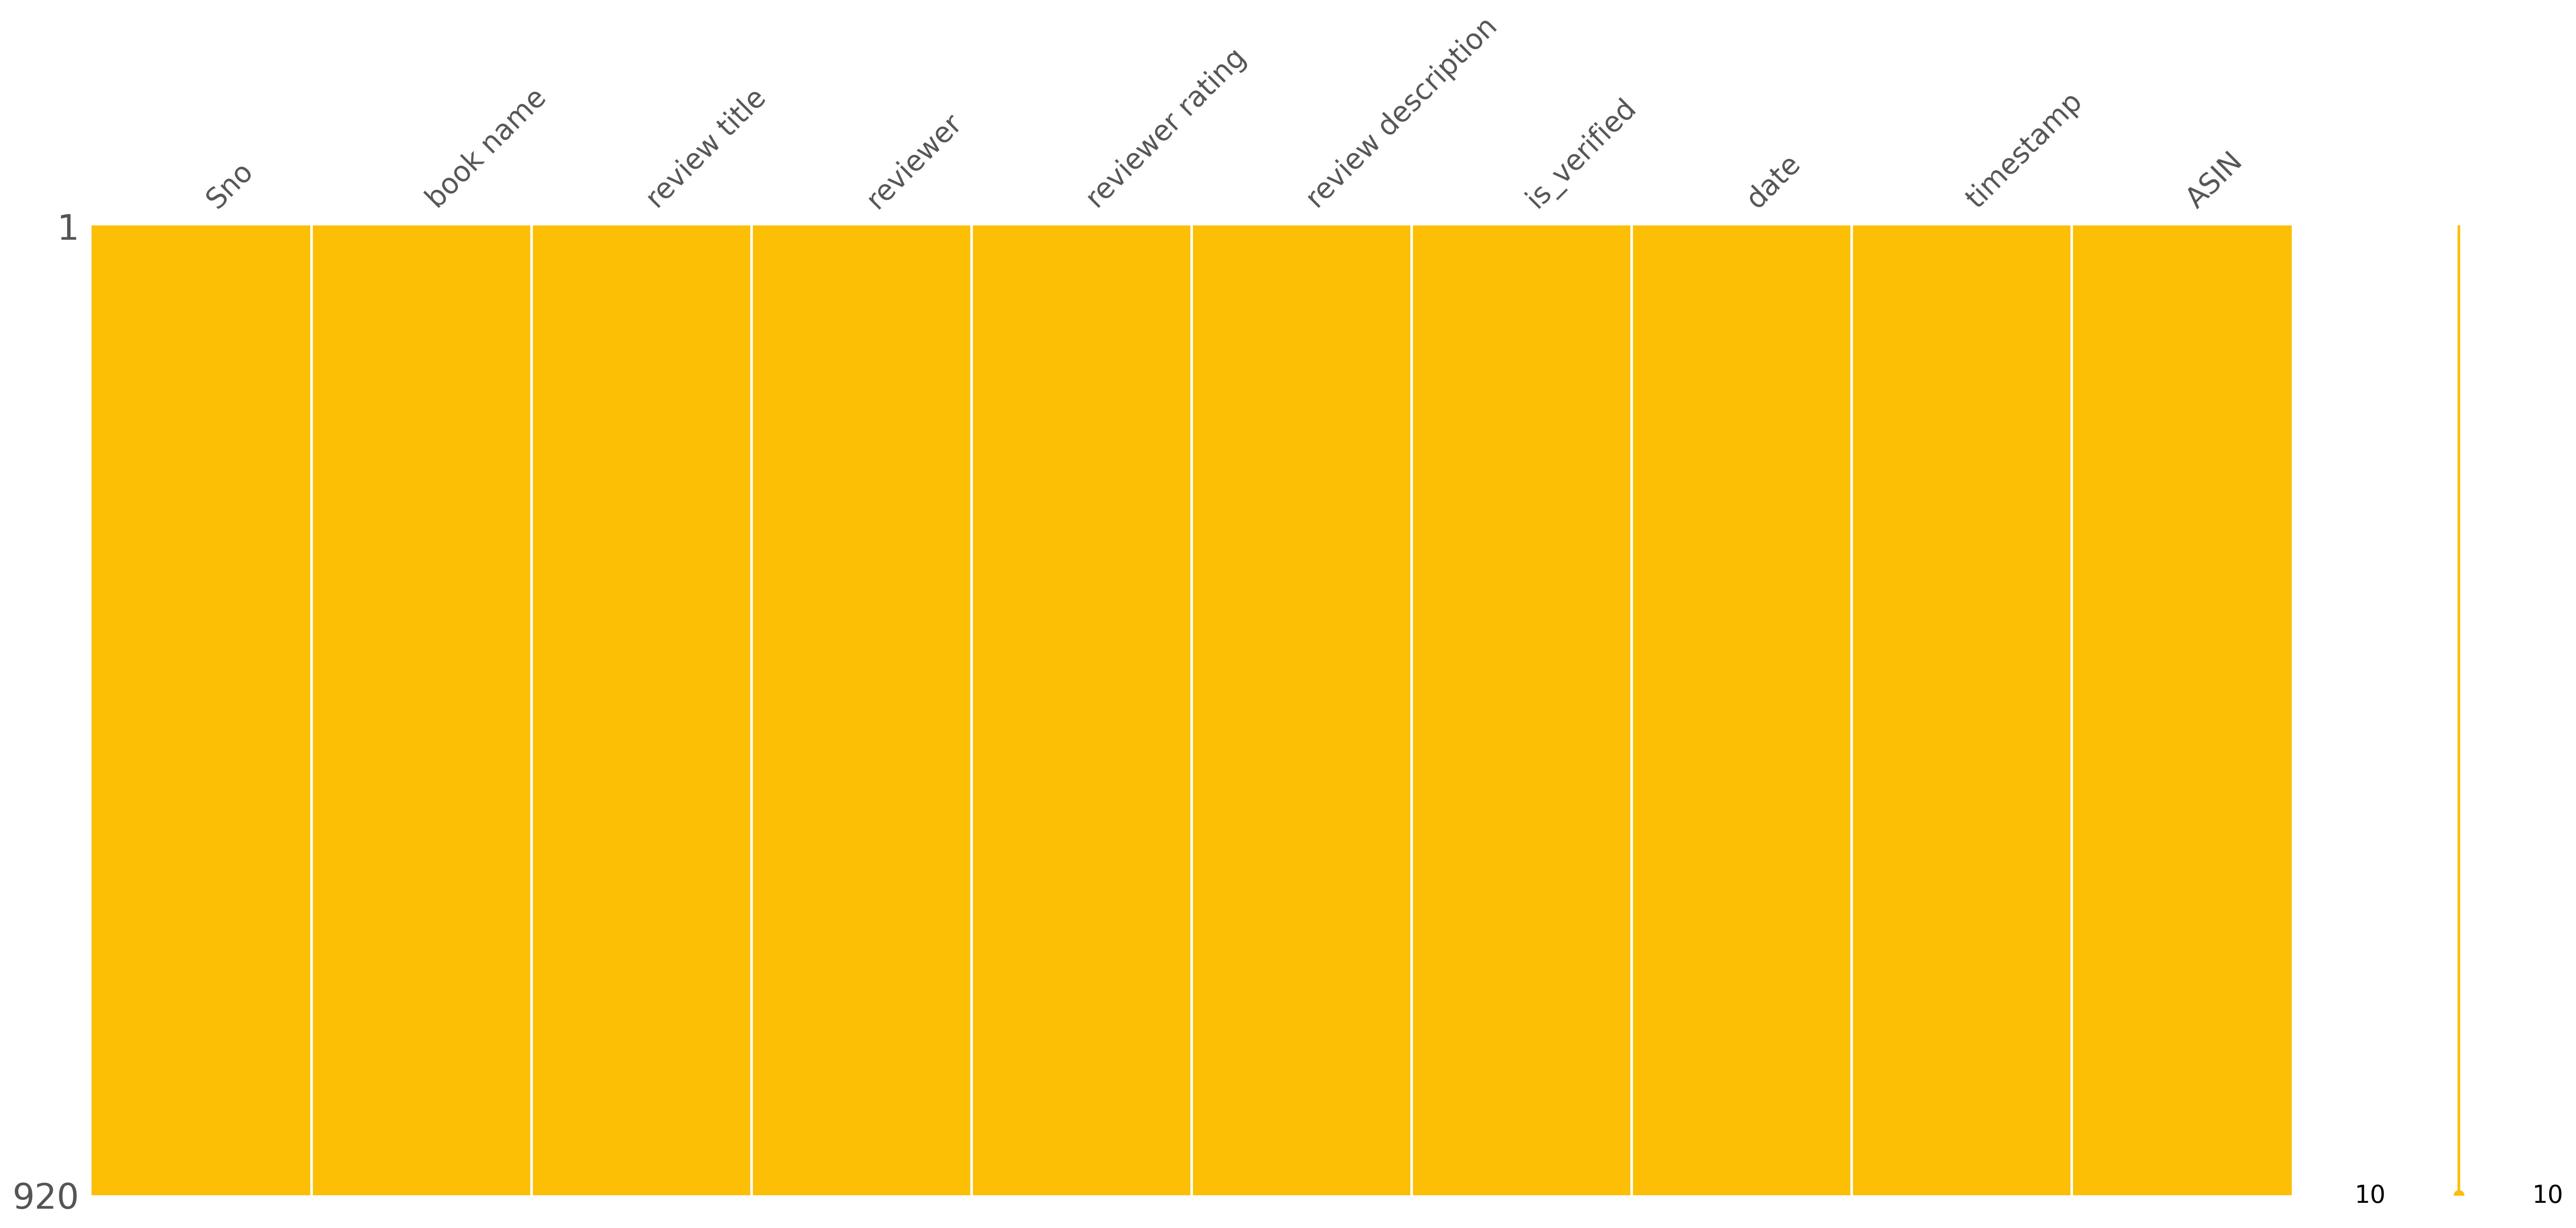

In [9]:
msno.matrix(df2,color=(0.99, 0.75, 0.023))

# BESTSELLERS' RATINGS COUNT:

In [10]:
df1.columns

Index(['Rank', 'book title', 'book price', 'rating', 'author',
       'year of publication', 'genre', 'url'],
      dtype='object')

In [11]:
temp_df = df1['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['rating'],
                y = temp_df['count'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'RATINGS COUNT' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace
bold("**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**")
py.iplot([pie_plot(df1['rating'].value_counts(), 'Rating')])

**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**

# Relationship between Price and User Rating

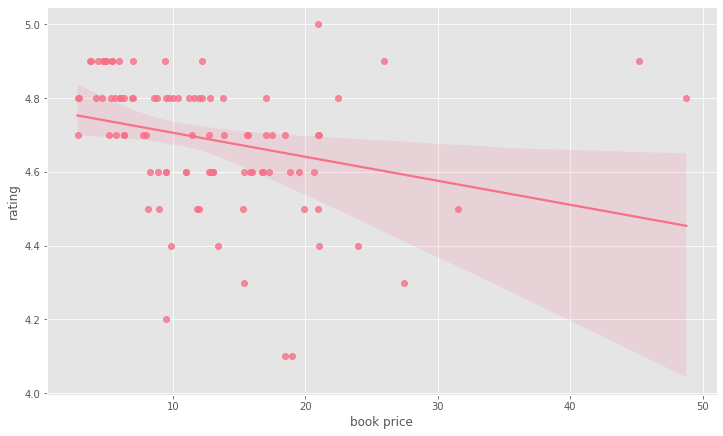

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=df1, x='book price', y='rating', ax=ax)
plt.show()

# Relationship between Price and year of publication

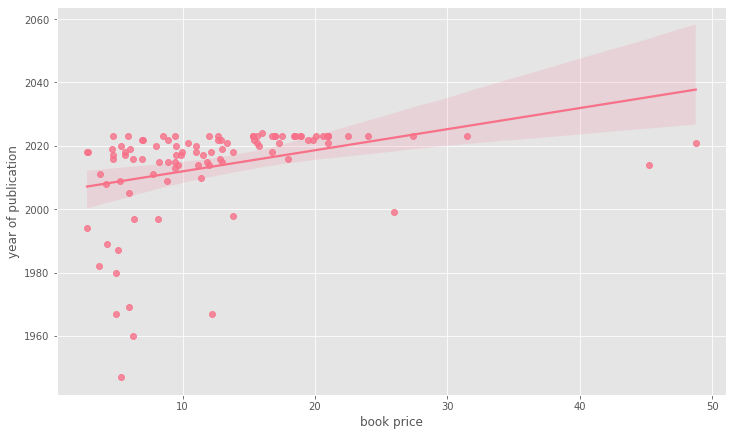

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=df1, x='book price', y='year of publication', ax=ax)
plt.show()

In [14]:
temp_df = df1['genre'].value_counts().reset_index()


'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.5,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**GENRE**")
py.iplot([pie_plot(df1['genre'].value_counts(), ['magenta', 'cyan'], 'GENRE')])
print(df1.genre.value_counts())

**GENRE**

genre
Nonfiction                                  6
Childrens, literature                       5
Childrens                                   4
Memoir                                      3
Fantasy                                     3
                                           ..
Thriller, mystery, suspense                 1
Spirituality, self-help, personal growth    1
Picture Book                                1
Picture Book, Colors, Wild Animals          1
Childrens, Picture Books                    1
Name: count, Length: 79, dtype: int64


In [15]:
temp_df = df1['author'].value_counts().reset_index()


'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**Value Counts of Authors**")
py.iplot([pie_plot(df1['author'].value_counts(), ['magenta', 'cyan'], 'Top Authors')])
print(df1.author.value_counts())

**Value Counts of Authors**

author
Sarah J. Maas          5
Adam Wallace           3
Rebecca Yarros         2
Suzanne Collins        2
Lucy Score             2
                      ..
David Brooks           1
Don Miguel Ruiz        1
Melissa Sweet          1
Christopher Paolini    1
Craig Smith            1
Name: count, Length: 85, dtype: int64


In [16]:
temp_df1 = df1.groupby('author').count().reset_index().sort_values('book title',ascending=False).head(5)


# create trace1
trace1 = go.Bar(
                x = temp_df1['author'],
                y = temp_df1['book title'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'AUTHORS WITH MOST BESTSELLERS ' , xaxis = dict(title = 'Author',tickangle=45), yaxis = dict(title = 'COUNT'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# Price

In [17]:
temp_df1 = df1.sort_values('book price',ascending=False).head(5)


# create trace1
trace1 = go.Bar(
                x = temp_df1['book title'],
                y = temp_df1['book price'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=3.5)))
layout = go.Layout(title = 'TOP 5 HIGHEST PRICED BESTSELLERS ' , xaxis = dict(title = 'Book',tickangle=20), yaxis = dict(title = 'Price $'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()




In [18]:
temp_df1 = df1.sort_values('book price').head(5)


# create trace1
trace1 = go.Bar(
                x = temp_df1['book title'],
                y = temp_df1['book price'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=3.5)))
layout = go.Layout(title = 'TOP 5 LOWEST PRICED BESTSELLERS ' , xaxis = dict(title = 'Book',tickangle=20), yaxis = dict(title = 'Price $'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()



# Working on text data

In [19]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [20]:
df2.head()

Sno        book name                                       review title  \
0    0  The Woman in Me   Unbelievably impressive. Her torn life on paper.   
1    1  The Woman in Me                         What a heartbreaking story   
2    2  The Woman in Me  Britney you are so invincible! You are an insp...   
3    3  The Woman in Me                               Fast Read, Sad Story   
4    4  The Woman in Me                       Buy it, it’s worth the read!   

           reviewer  reviewer rating  \
0  Murderess Marbie                4   
1               L J                5   
2             Jamie                5   
3               KMG                5   
4   Stephanie Brown                5   

                                  review description  is_verified        date  \
0  I'm only a third way in. Shipped lightening fa...         True  26-10-2023   
1  "There have been so many times when I was scar...         True  06-11-2023   
2  The media could not be loaded. I personally ha...         True  01-11-2023   
3  I have been a fan of Britney's music since the...         True  25-10-2023   
4  Whether or not you’re a fan, it’s a great read...         True  01-11-2023   

                                        timestamp        ASIN  
0  Reviewed in the United States October 26, 2023  1668009048  
1  Reviewed in the United States November 6, 2023  1668009048  
2  Reviewed in the United States November 1, 2023  1668009048  
3  Reviewed in the United States October 25, 2023  1668009048  
4  Reviewed in the United States November 1, 2023  1668009048

In [21]:
df2['review_length_ch']=df2['review description'].apply(lambda x:len(x))


In [22]:
df2['review_length_ch']

0      3060
1      1530
2      4204
3      2941
4      1790
       ... 
915     141
916     125
917     168
918     223
919     200
Name: review_length_ch, Length: 920, dtype: int64

In [23]:
df2['review_length_ch'][df2['review_length_ch']>4000]

2      4204
10     5648
12     4411
14     5306
30     6629
       ... 
794    6817
798    5482
799    4939
890    5442
892    4233
Name: review_length_ch, Length: 69, dtype: int64

In [24]:
df2=df2.loc[df2['review_length_ch']<=4000]
df2['review_length']=df2['review_length_ch'].apply(lambda x:'short' if x <=500 else 'long')

# Check Reviews Length

<Axes: >

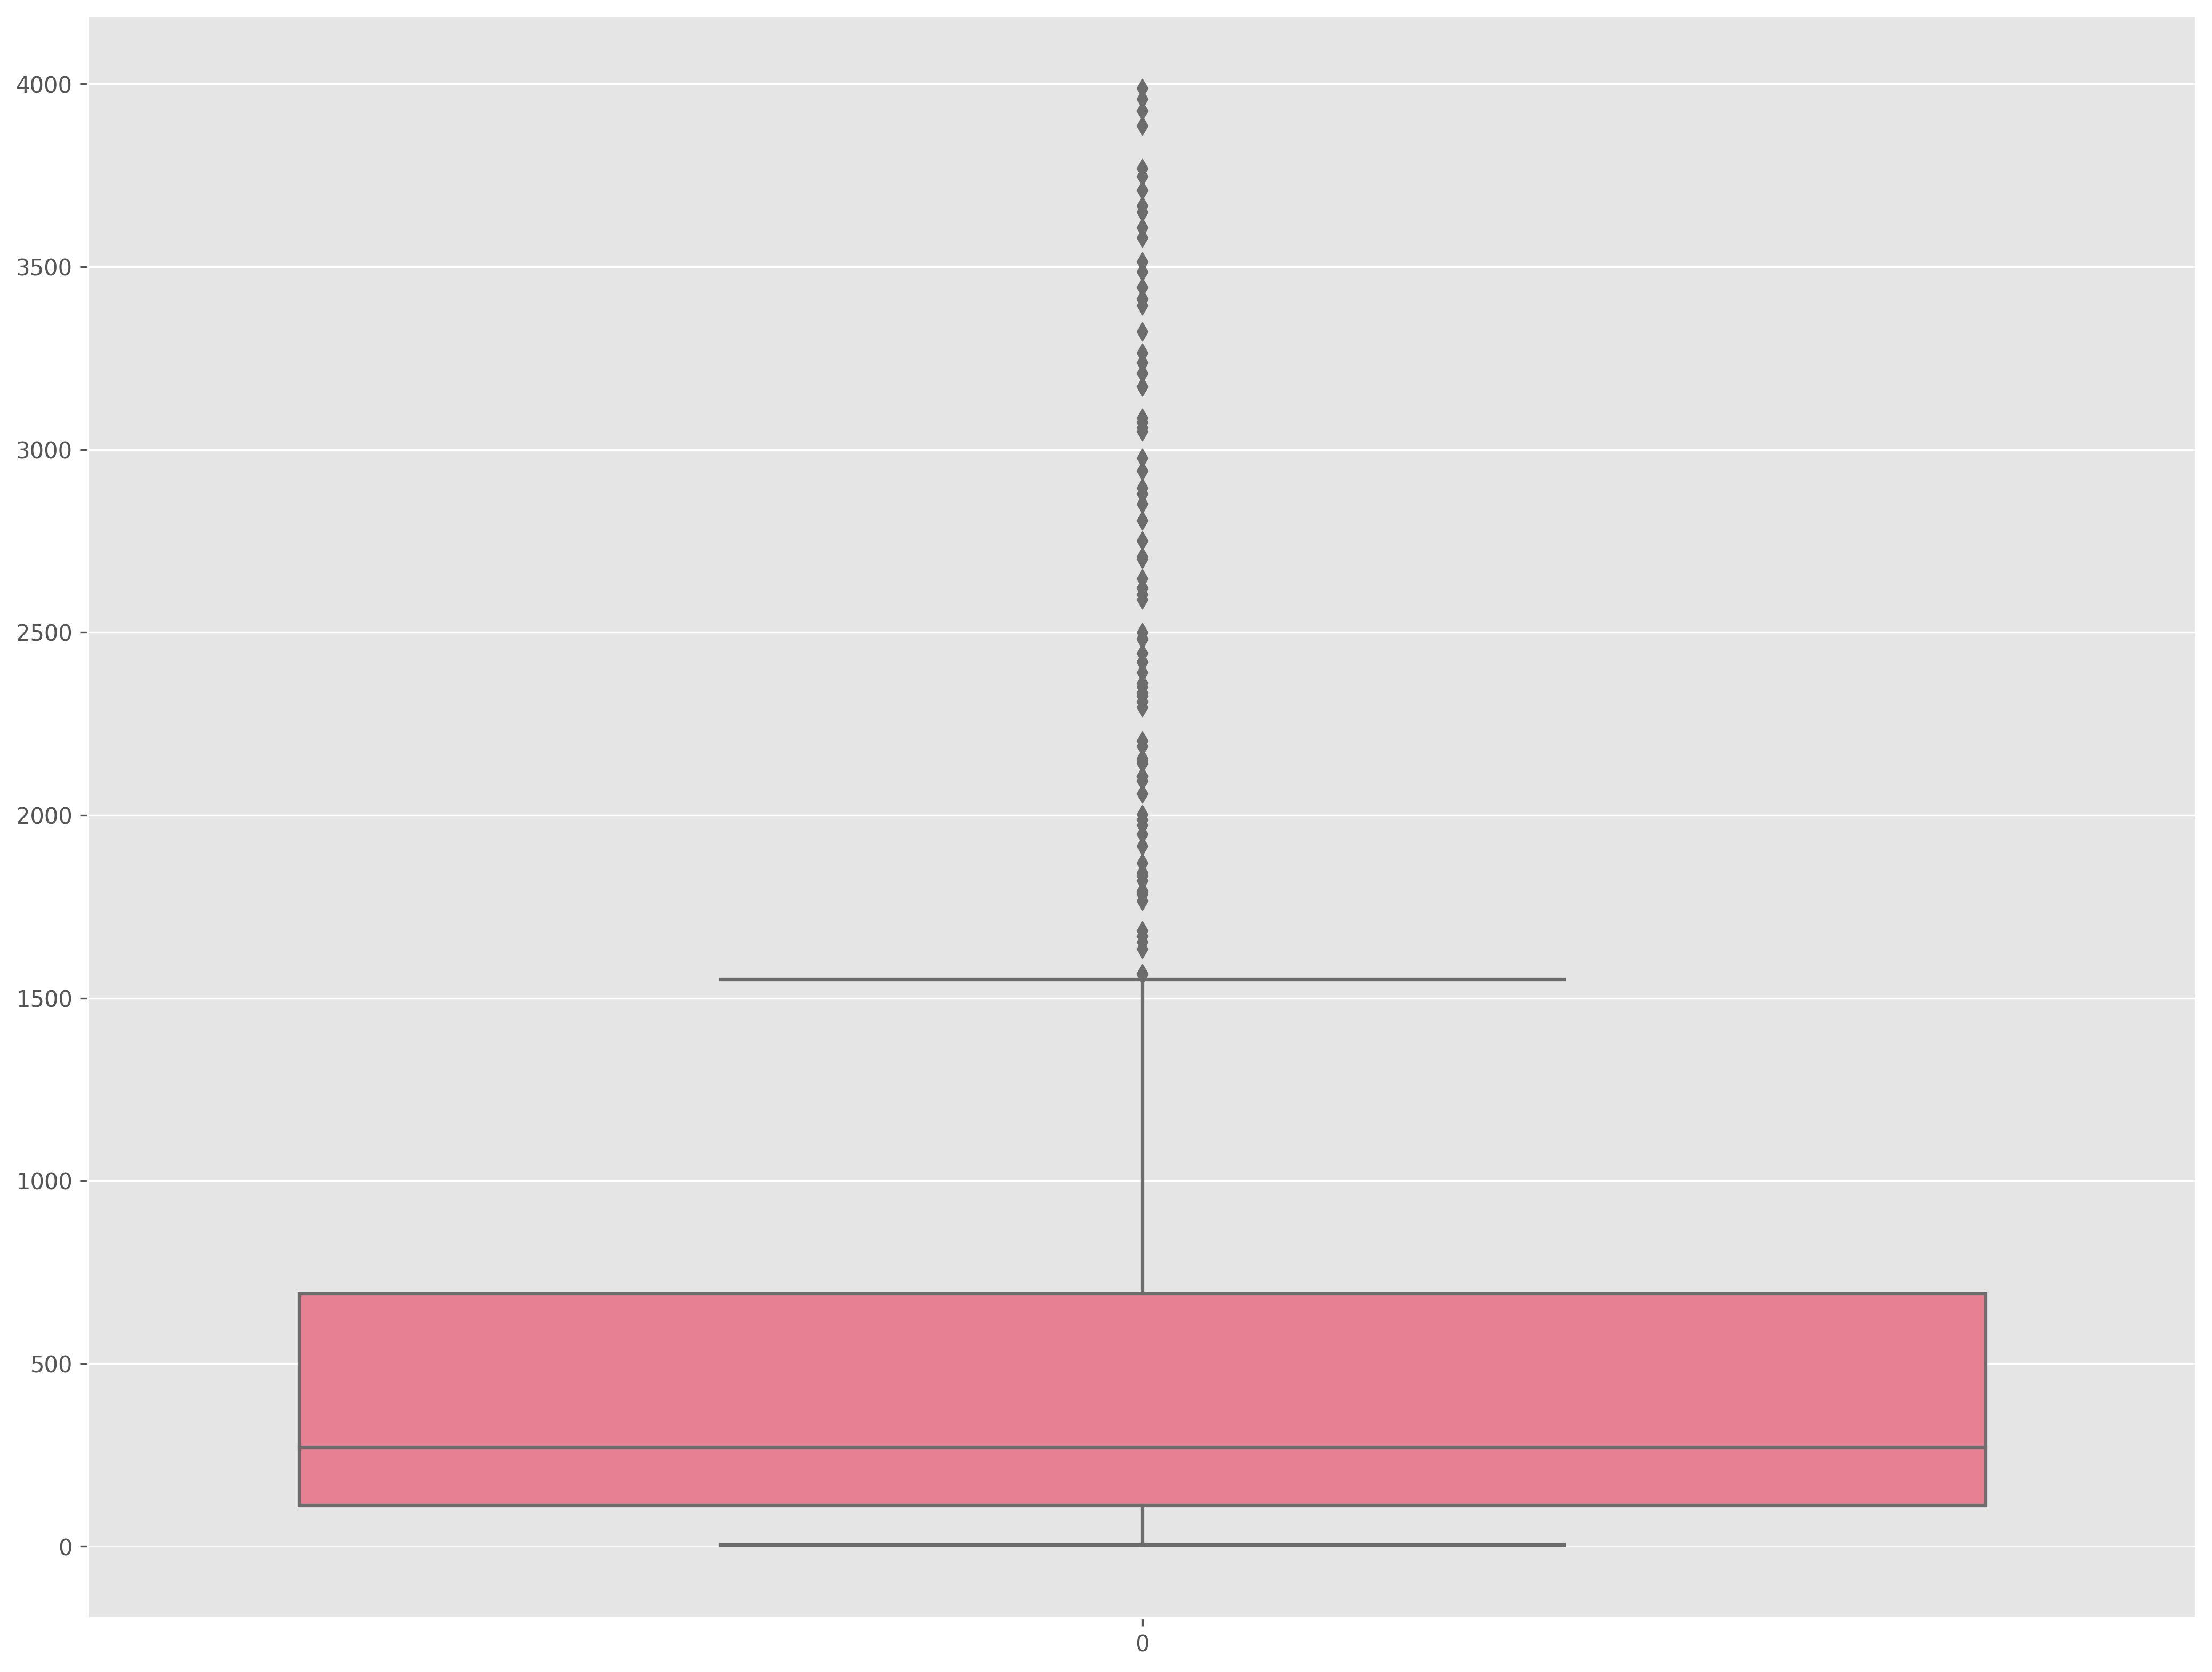

In [25]:
sns.boxplot(df2['review_length_ch'])

In [26]:
reviews = df2['review description'].drop_duplicates()

In [27]:
reviews 

0      I'm only a third way in. Shipped lightening fa...
1      "There have been so many times when I was scar...
3      I have been a fan of Britney's music since the...
4      Whether or not you’re a fan, it’s a great read...
5      I had to finish the book in a week, because I ...
                             ...                        
915    This is exactly the kind of book children unde...
916    We get this book for all our grandchildren the...
917    I saw a grandma reading this book to her grand...
918    I have ordered this book over and over to give...
919    This book was hysterical! My daughter loves it...
Name: review description, Length: 843, dtype: object

In [28]:
all_sentences = []

for word in reviews:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

### Removing Punctuation

In [29]:
import re

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

### Gettig Words roots

In [30]:
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

# Top Mention Keywords

In [31]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [32]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
        
        
df = pd.DataFrame(stem2)
df = df[0].value_counts()
df = df[:30,]
px.bar(df, x=df.values,y= df.index, color=df.index, height=700)

## Sentiment Analysis

#### Removing characters

In [33]:
features=reviews.values

processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

#### Adding Subjectivity & Polarity

In [34]:
df3=pd.DataFrame()
df3['reviews']=processed_features
#=======
from textblob import TextBlob
from wordcloud import WordCloud
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df3['Subjectivity'] = df3['reviews'].apply(getSubjectivity)
df3['Polarity'] = df3['reviews'].apply(getPolarity)

In [35]:
#Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)
df3

reviews  Subjectivity  \
0    i only third way in shipped lightening fast th...      0.546210   
1     there have been so many times when was scared...      0.429262   
2    i have been fan of britney music since the 00s...      0.526394   
3    whether or not you re fan it a great read brit...      0.609484   
4    i had to finish the book in week because neede...      0.547479   
..                                                 ...           ...   
838  this is exactly the kind of book children unde...      0.514286   
839  we get this book for all our grandchildren the...      0.350000   
840  i saw grandma reading this book to her grandch...      0.775000   
841  i have ordered this book over and over to give...      0.535000   
842  this book was hysterical my daughter loves it ...      0.684286   

     Polarity  Analysis  
0    0.196073  Positive  
1   -0.115581  Negative  
2    0.088821  Positive  
3    0.153413  Positive  
4    0.029902  Positive  
..        ...       ...  
838  0.372619  Positive  
839  0.275000  Positive  
840  0.412500  Positive  
841  0.340000  Positive  
842  0.122857  Positive  

[843 rows x 4 columns]

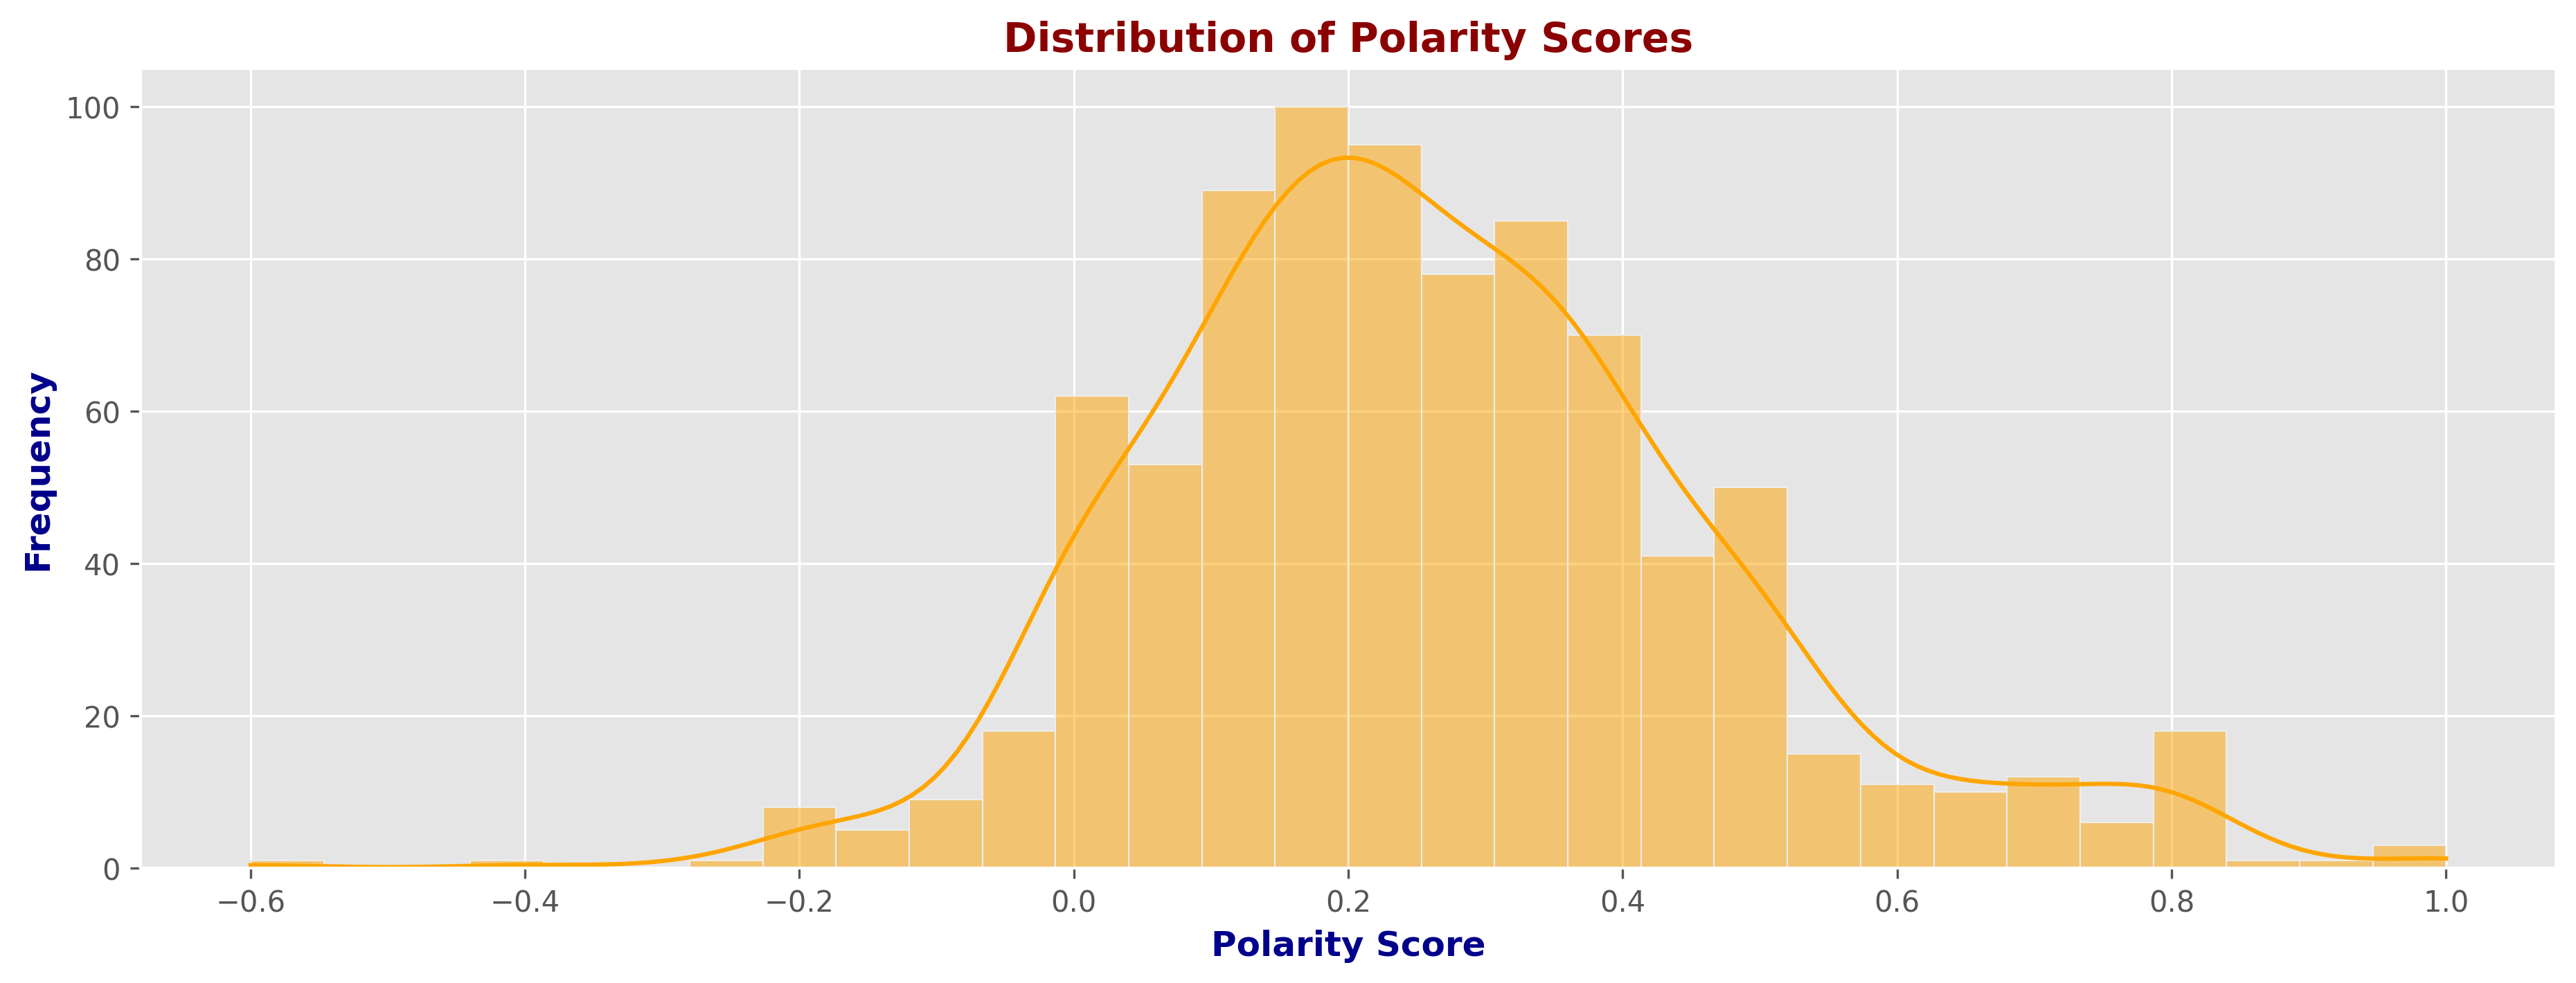

In [36]:
# Sentiment Analysis
# We'll use the TextBlob library for sentiment analysis
from textblob import TextBlob


# Plotting Sentiment Distribution
plt.figure(figsize=(15, 5))
sns.histplot(df3['Polarity'], kde=True, color='orange')
plt.title('Distribution of Polarity Scores', fontsize = 14, fontweight = 'bold', color = 'darkred')
plt.xlabel('Polarity Score', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Distribution of Sentiment Scores.png')
plt.show()

In [37]:
Neutral = len(df3[df3['Analysis']=='Neutral'])
Negative = len(df3[df3['Analysis']=='Negative'])
Positive = len(df3[df3['Analysis']=='Positive'])
labels = ['Negative','Positive','Neutral']
values = [Negative,Positive,Neutral]

#====
import plotly.graph_objects as go
colors = ['red','orange', 'lightblue' ]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textposition='inside',
                  marker=dict(colors=colors, line=dict(color='grey', width=0.1)))
fig.show()

# Word Cloud

### This word cloud visually represents the most frequently occurring words in the reviews. The size of each word is proportional to its frequency. It gives a quick overview of the main topics or sentiments expressed in the reviews.

# Review Title

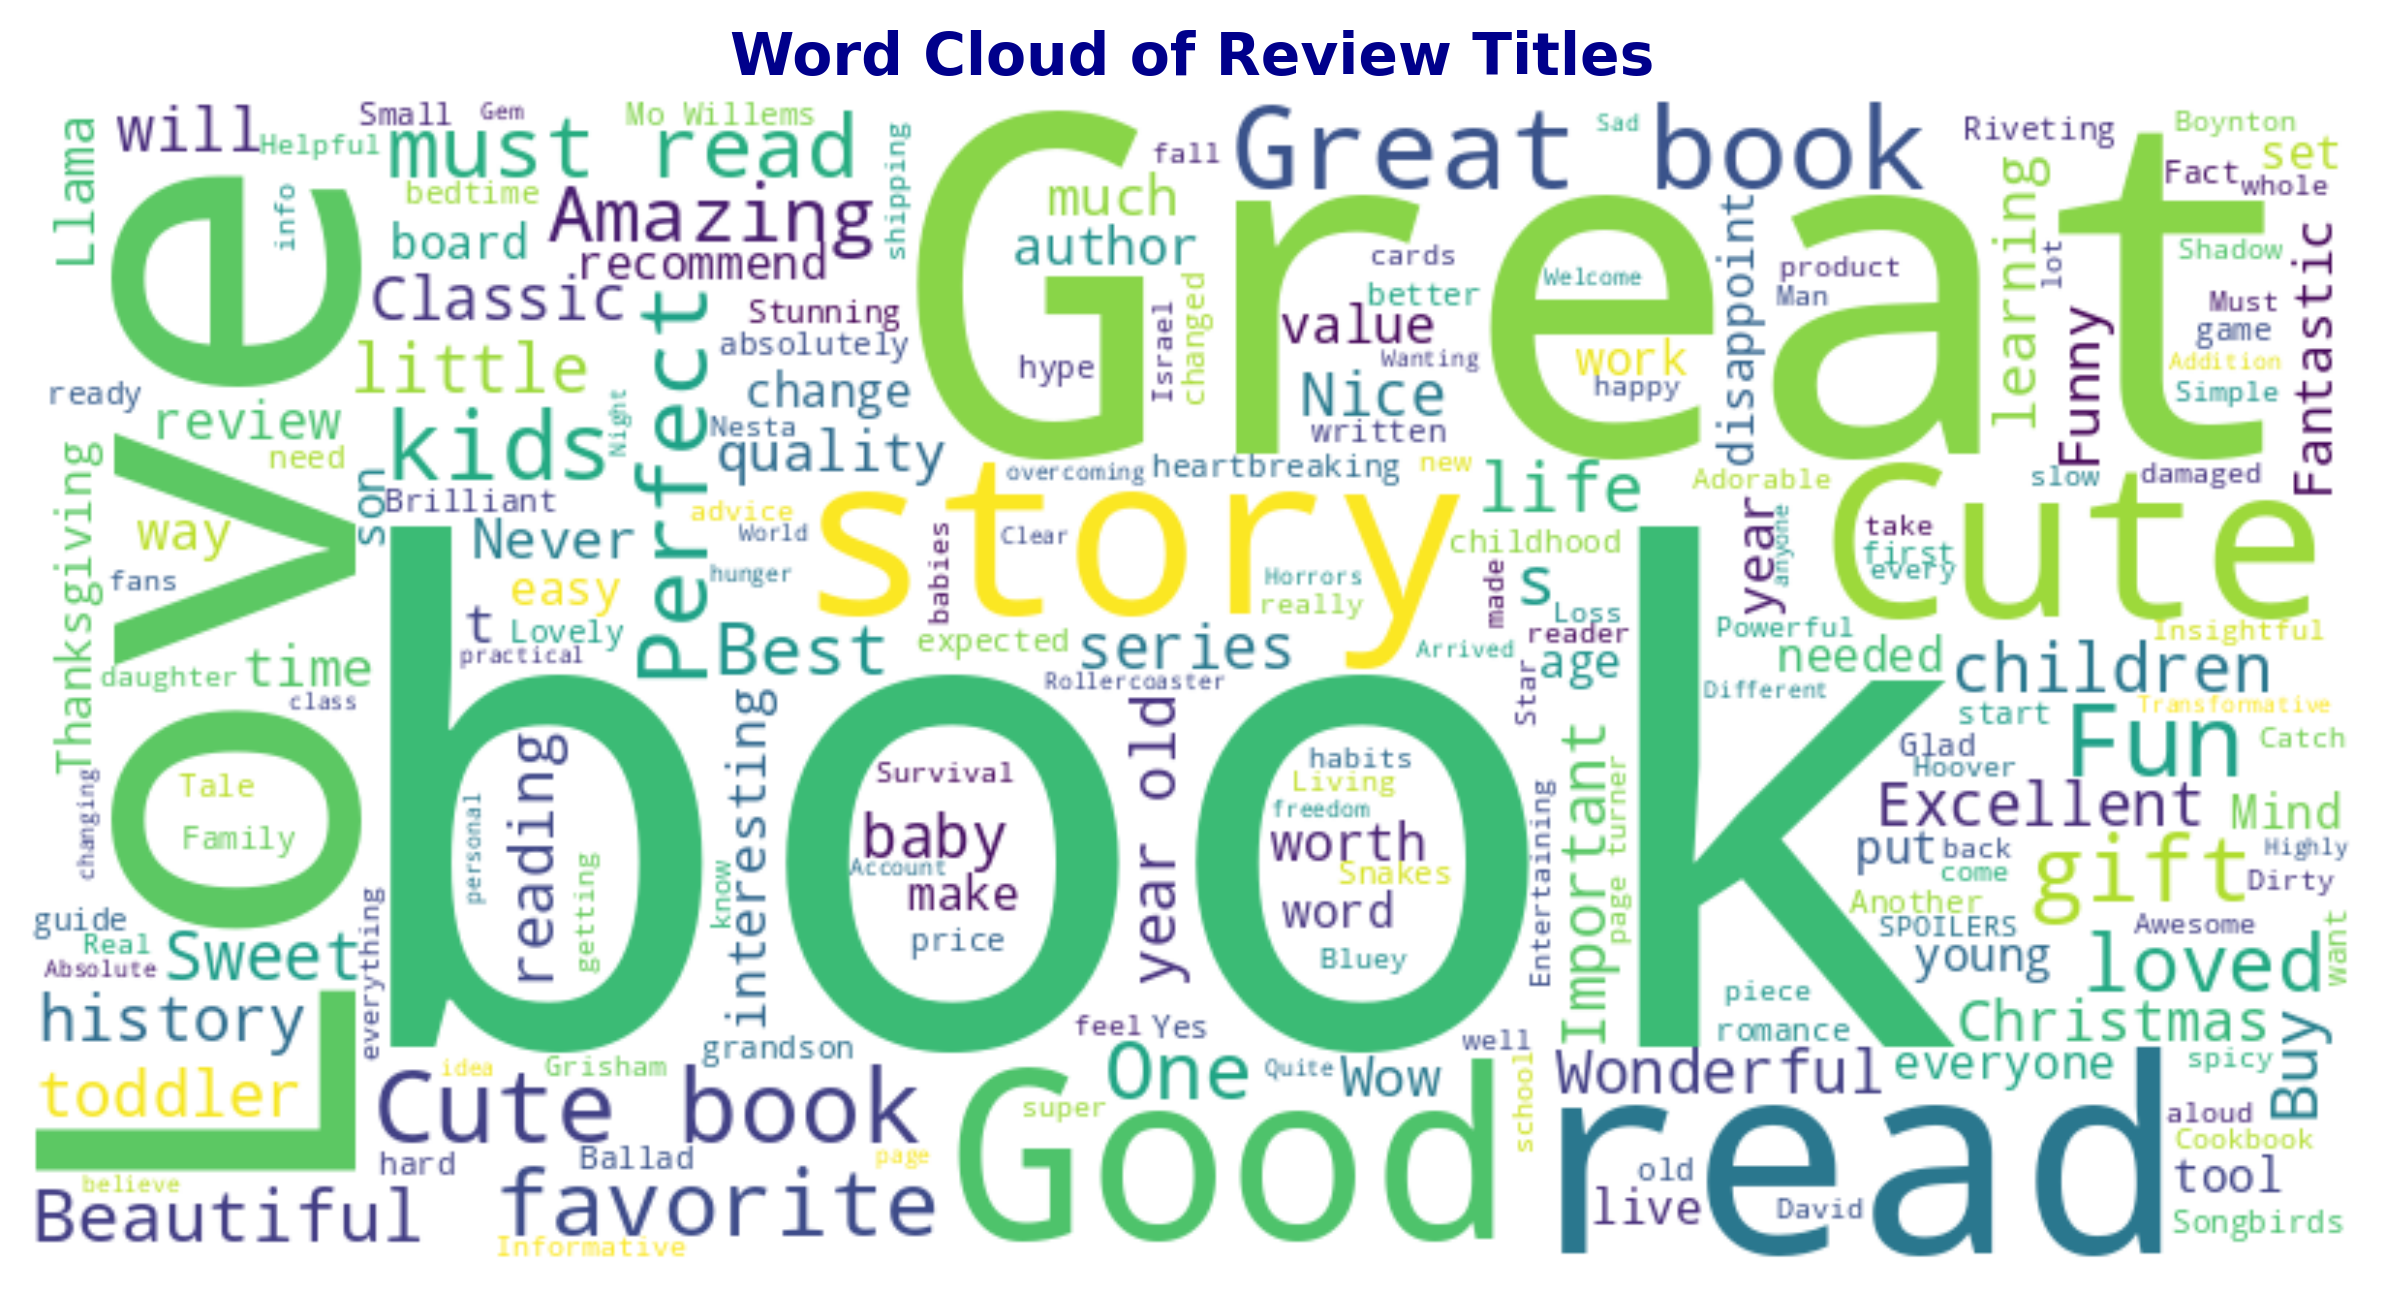

In [38]:
# Convert 'Review' column to string type
df2['review title'] = df2['review title'].astype(str)

# Word Cloud of Reviews
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df2['review title']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Review Titles', fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.axis('off')
plt.savefig('Word Cloud of Reviews.png')
plt.show()

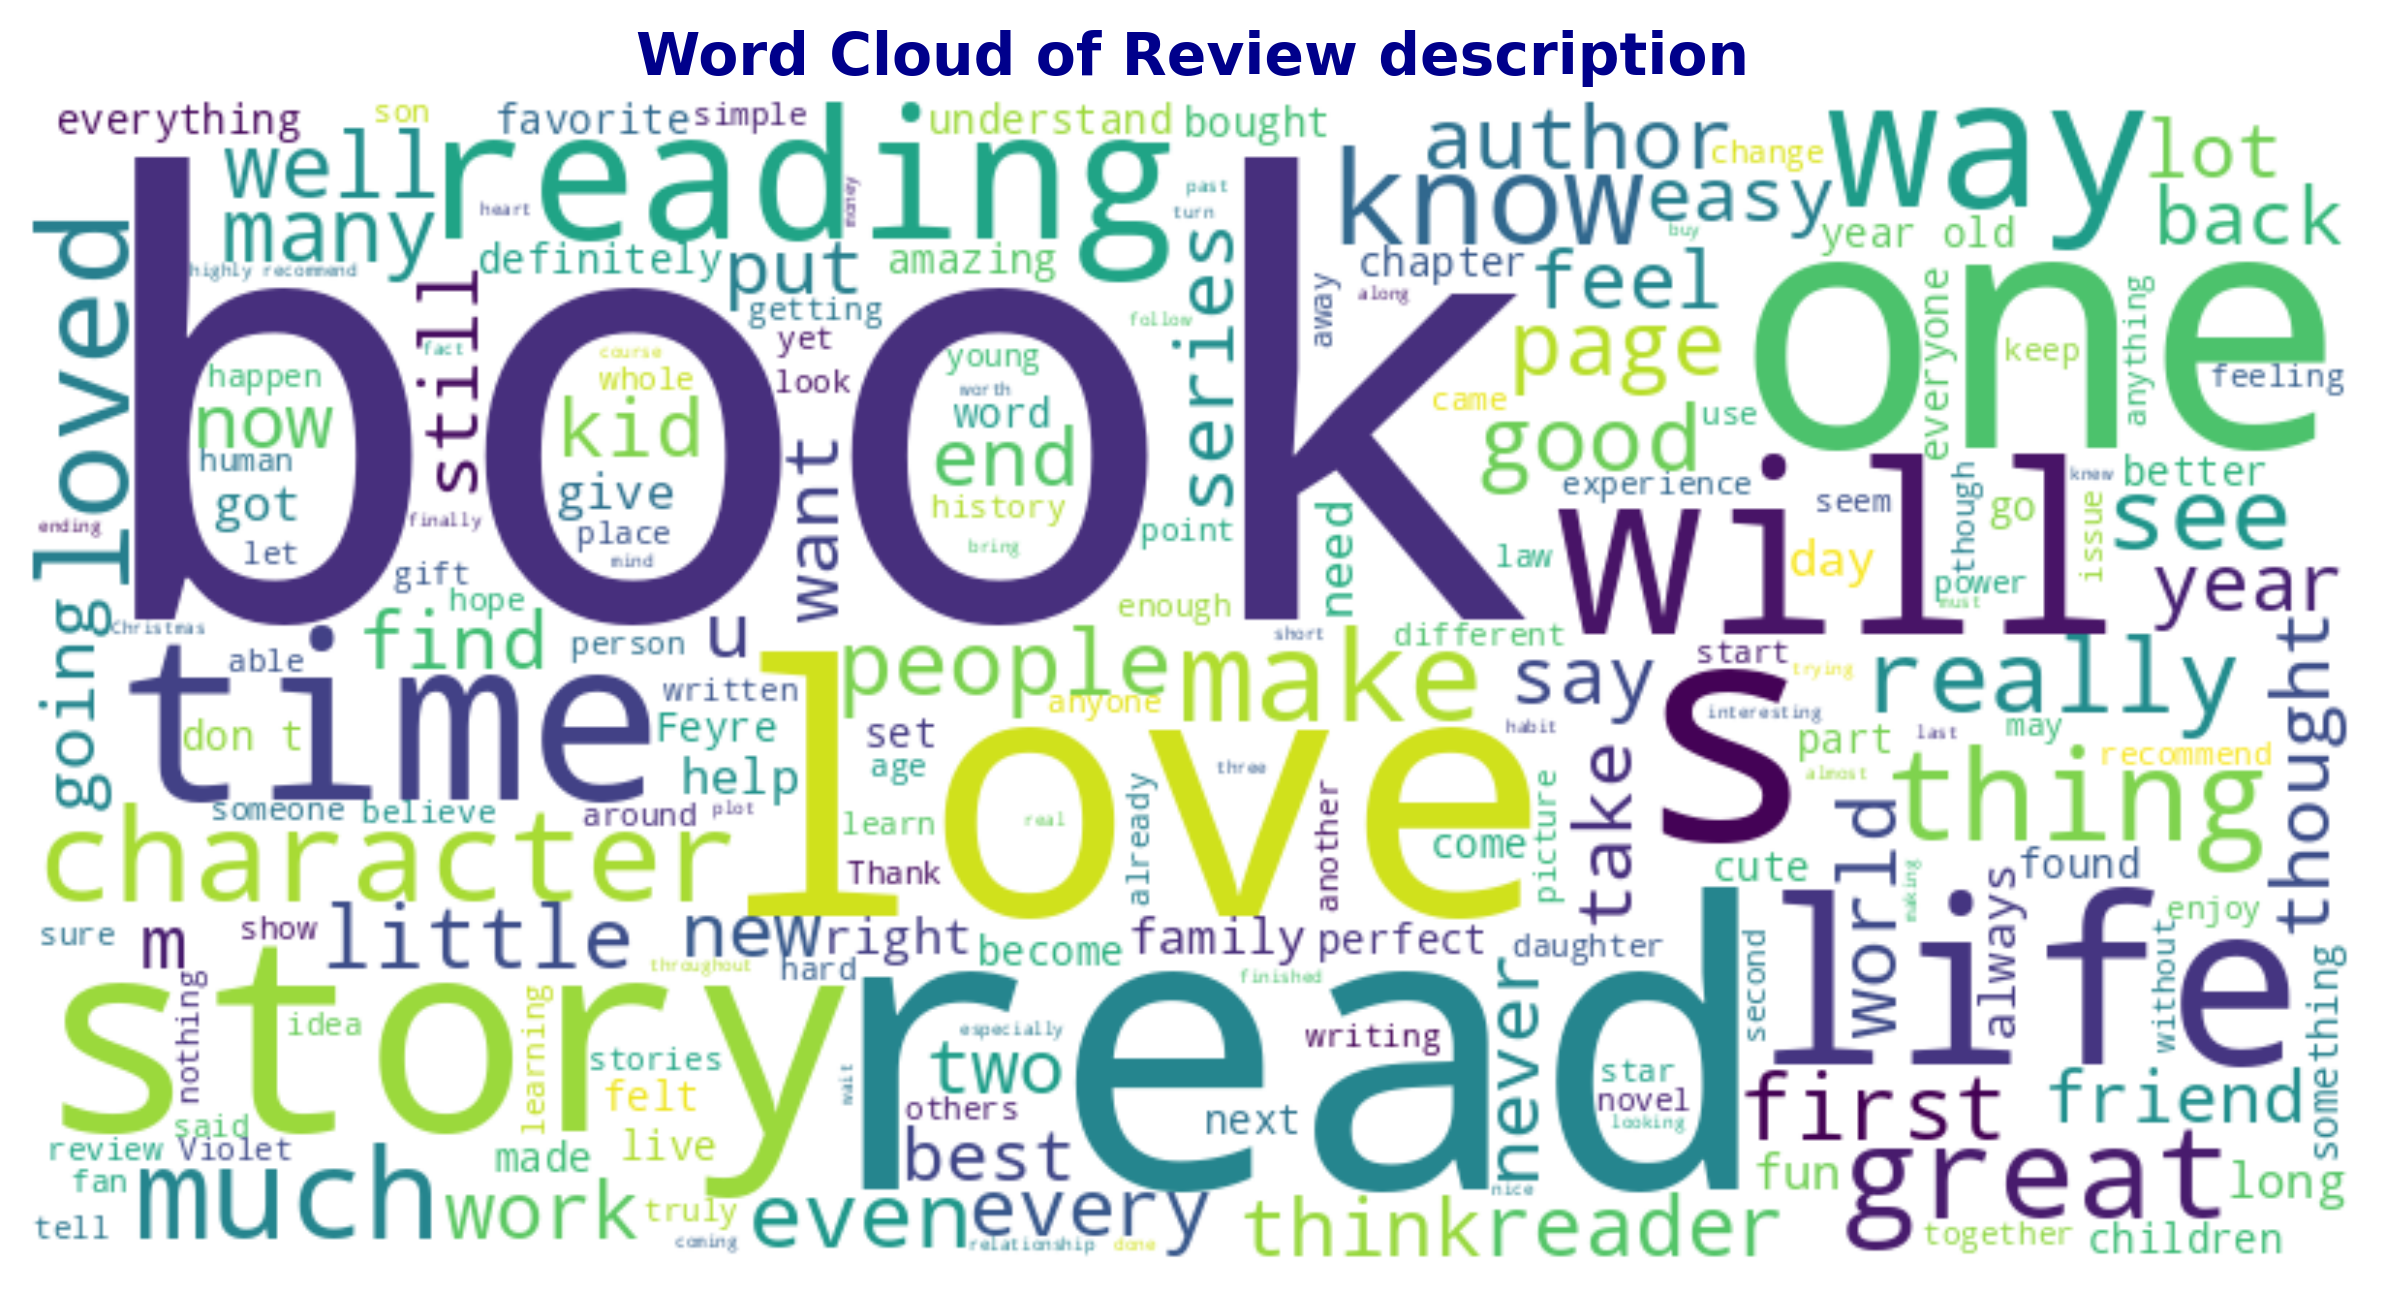

In [39]:
# Convert 'Review' column to string type
df2['review description'] = df2['review description'].astype(str)

# Word Cloud of Reviews
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df2['review description']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Review description', fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.axis('off')
plt.savefig('Word Cloud of Reviews description.png')
plt.show()

## Thanks for viewing this notebook. I hope it helped you gain some insights.